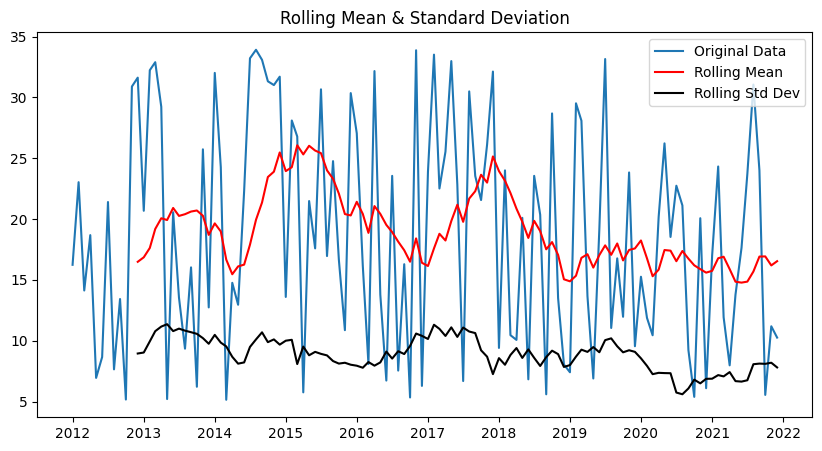

ADF Test Statistic: -9.886813891901397
P-value: 3.6455466907399357e-17
Critical Values: {'1%': -3.4865346059036564, '5%': -2.8861509858476264, '10%': -2.579896092790057}
The data is stationary (Reject H0).


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Load dataset
df = pd.read_csv("/content/us_air_pollution_2012_2021_updated.csv")

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.set_index('Date', inplace=True)

# Select the pollution column (update the name if needed)
pollution_col = "PM2.5 (µg/m³)"

# Plot rolling statistics
plt.figure(figsize=(10, 5))
plt.plot(df[pollution_col], label="Original Data")
plt.plot(df[pollution_col].rolling(window=12).mean(), label="Rolling Mean", color='red')
plt.plot(df[pollution_col].rolling(window=12).std(), label="Rolling Std Dev", color='black')
plt.legend()
plt.title("Rolling Mean & Standard Deviation")
plt.show()

# Augmented Dickey-Fuller (ADF) Test
result = adfuller(df[pollution_col].dropna())
print(f"ADF Test Statistic: {result[0]}")
print(f"P-value: {result[1]}")
print("Critical Values:", result[4])

if result[1] < 0.05:
    print("The data is stationary (Reject H0).")
else:
    print("The data is non-stationary (Fail to Reject H0).")
